In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [324]:
# definition du repertoire courant
os.chdir(r"C:\Users\ROUZOUMKA\Mes docs jupyter\Projet personnel\data\data")

In [325]:
# importation des données
WDICountry = pd.read_csv("WDICountry.csv")
WDICountry_Series = pd.read_csv("WDICountry-Series.csv")
WDIData = pd.read_csv("WDIData.csv")
WDIFootNote = pd.read_csv("WDIFootNote.csv")
WDISeries = pd.read_csv("WDISeries.csv")
WDISeries_Time = pd.read_csv("WDISeries-Time.csv")

In [326]:
WDIData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
WDIData.shape

(383838, 66)

In [328]:
WDIData.describe

<bound method NDFrame.describe of                        Country Name Country Code  \
0       Africa Eastern and Southern          AFE   
1       Africa Eastern and Southern          AFE   
2       Africa Eastern and Southern          AFE   
3       Africa Eastern and Southern          AFE   
4       Africa Eastern and Southern          AFE   
...                             ...          ...   
383833                     Zimbabwe          ZWE   
383834                     Zimbabwe          ZWE   
383835                     Zimbabwe          ZWE   
383836                     Zimbabwe          ZWE   
383837                     Zimbabwe          ZWE   

                                           Indicator Name     Indicator Code  \
0       Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   
1                 Access to electricity (% of population)     EG.ELC.ACCS.ZS   
2       Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   
3       Access to ele

In [329]:
# Obtenir les noms des colonnes
WDIData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [330]:
# Obtenir le nombre d'indicateurs qui ne se repetent pas
len(WDIData["Indicator Name"].unique())

1443

In [331]:
# Obtenir le nombre de pays qui ne se repetent pas
len(WDIData["Country Name"].unique())

266

In [332]:
# compter les valeurs manquantes
Valeurs_Manquantes = WDIData.isnull().sum().sort_values()
Valeurs_Manquantes.head(15)

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
2010              164909
2014              165822
2012              167390
2015              170424
2016              170917
2011              172093
2013              173088
2017              174418
2007              177403
2009              178528
2008              179698
dtype: int64

In [333]:
# les pourcentanges des valeurs manquantes
prc = (Valeurs_Manquantes / WDIData.shape[0])*100
prc.head(10)

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
2010              42.963177
2014              43.201038
2012              43.609544
2015              44.399981
2016              44.528421
2011              44.834800
dtype: float64

In [334]:
# ceux qui ont moins de 50% de valeurs manquantes
prc[prc<50]

Country Name       0.000000
Country Code       0.000000
Indicator Name     0.000000
Indicator Code     0.000000
2010              42.963177
2014              43.201038
2012              43.609544
2015              44.399981
2016              44.528421
2011              44.834800
2013              45.094024
2017              45.440524
2007              46.218196
2009              46.511289
2008              46.816105
2018              47.097734
2006              47.570590
2005              47.745403
dtype: float64

In [335]:
# choisir que la colonne 2016 pour l'année des indicateurs
# car c'est l'une des années ayant le moins de valeurs manquantes
new_WDIData = WDIData[["Country Name", "Indicator Name", "2018"]]
new_WDIData

,Country Name,Indicator Name,2018
0,Africa Eastern and Southern,Access to clean fuels and technologies for coo...,NaN
1,Africa Eastern and Southern,Access to electricity (% of population),42.168241
2,Africa Eastern and Southern,"Access to electricity, rural (% of rural popul...",26.813900
3,Africa Eastern and Southern,"Access to electricity, urban (% of urban popul...",71.994933
4,Africa Eastern and Southern,Account ownership at a financial institution o...,NaN
...,...,...,...
383833,Zimbabwe,Women who believe a husband is justified in be...,NaN
383834,Zimbabwe,Women who were first married by age 15 (% of w...,NaN
383835,Zimbabwe,Women who were first married by age 18 (% of w...,NaN
383836,Zimbabwe,Women's share of population ages 15+ living wi...,60.000000


### Il faut maintenant essayer de mettre les differents indicateurs en colonne pour que les pays en ligne ne se repetent plus et donc que chaque ligne soit unique dans la colonne *country code*.

In [336]:
# mise des indicateurs en colonnes
new_WDIData1 = new_WDIData.pivot_table(values = "2018", index = "Country Name", columns = "Indicator Name")
new_WDIData1

Indicator Name,ARI treatment (% of children under 5 taken to a health provider),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),"Adjusted net enrollment rate, primary (% of primary school age children)","Adjusted net enrollment rate, primary, female (% of primary school age children)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,67.7,98.715622,98.309603,99.902145,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.900000,500.0
Africa Eastern and Southern,NaN,42.168241,26.813900,71.994933,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.851736,NaN
Africa Western and Central,NaN,51.253253,28.104923,80.357898,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.501807,NaN
Albania,82.4,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,97.44221,NaN,...,6.8,1.8,0.8,3.7,5.2,0.9,1.4,11.8,27.200000,100.0
Algeria,NaN,99.641922,98.961946,99.898178,NaN,NaN,NaN,NaN,99.64750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.500000,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,99.990372,99.962678,99.999039,NaN,NaN,NaN,NaN,97.10722,97.25022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,NaN,89.419014,80.939011,97.012843,NaN,NaN,NaN,NaN,90.45493,89.45854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,450000.0
"Yemen, Rep.",NaN,62.000000,48.698349,85.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.500000,200.0


In [337]:
# les sommes des valeurs manquantes par colonne
v_m2 = new_WDIData1.isnull().sum().sort_values()
v_m2

Indicator Name
Access to electricity (% of population)                                                                                     1
Population, total                                                                                                           1
Population density (people per sq. km of land area)                                                                         1
Population growth (annual %)                                                                                                1
Surface area (sq. km)                                                                                                       1
                                                                                                                         ... 
Electric power consumption (kWh per capita)                                                                               264
Progression to secondary school, female (%)                                                            

In [338]:
# pourcentage de valeur manquante par colonne
prc1 = (v_m2/new_WDIData1.shape[0])*100
prc1

Indicator Name
Access to electricity (% of population)                                                                                    0.377358
Population, total                                                                                                          0.377358
Population density (people per sq. km of land area)                                                                        0.377358
Population growth (annual %)                                                                                               0.377358
Surface area (sq. km)                                                                                                      0.377358
                                                                                                                            ...    
Electric power consumption (kWh per capita)                                                                               99.622642
Progression to secondary school, female (%)                  

In [339]:
# une autre manière de faire pour avoir un nouveau data avec les nouvelles variables

#n_prc = prc1[prc1 < 5]
#Id = n_prc.index
#Id
# nouveau data Frame contenant les variables ayant moins de 5% de valeurs manquantes
#new_WDIData2 = new_WDIData1[[Id[i] for i in range(len(Id))]]
#new_WDIData2

In [340]:
new_WDIData1 = new_WDIData1.loc[:,prc1<4.9]
new_WDIData1

Indicator Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),Arable land (hectares per person),"Bird species, threatened","Birth rate, crude (per 1,000 people)",Capture fisheries production (metric tons),...,Rural population (% of total population),"Secondary education, duration (years)",Secure Internet servers (per 1 million people),Surface area (sq. km),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total fisheries production (metric tons),Urban population,Urban population (% of total population),Urban population growth (annual %)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,98.715622,98.309603,99.902145,58.081365,3.791900e+05,11.798854,0.207226,16.0,32.487000,2.050000e+03,...,74.505000,6.0,52.862480,6.528600e+05,0.104707,0.104707,1.000000e+04,9.476982e+06,25.495000,3.349934
Africa Eastern and Southern,42.168241,26.813900,71.994933,44.117980,6.532568e+06,8.247616,0.184952,655.0,33.913034,4.115035e+06,...,64.192230,6.0,1164.559933,1.512116e+07,14.997499,16.907346,4.342773e+06,2.302762e+08,35.807770,4.046987
Africa Western and Central,51.253253,28.104923,80.357898,39.953545,3.614110e+06,11.224018,0.233279,338.0,37.148465,4.178921e+06,...,53.366862,7.0,89.707350,9.166270e+06,14.198423,15.725047,4.566931e+06,2.029611e+08,46.633138,4.074033
Albania,100.000000,100.000000,100.000000,42.849672,1.174081e+04,22.311898,0.213282,8.0,11.780000,8.648300e+03,...,39.681000,7.0,526.099856,2.875000e+04,13.525683,17.736095,1.490630e+04,1.728969e+06,60.319000,1.317162
Algeria,99.641922,98.961946,99.898178,17.364964,4.135885e+05,3.151063,0.177724,15.0,24.282000,1.152550e+05,...,27.371000,7.0,67.608505,2.381741e+06,7.105493,7.495060,1.203551e+05,3.067008e+07,72.629000,2.805020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,99.990372,99.962678,99.999039,NaN,NaN,NaN,NaN,15.0,29.282000,3.201000e+03,...,23.836000,8.0,469.021492,6.020000e+03,NaN,8.359252,3.950000e+03,3.479999e+06,76.164000,2.888119
World,89.419014,80.939011,97.012843,36.903521,4.795343e+07,10.825170,0.184228,NaN,18.169341,NaN,...,44.728290,6.0,6171.416896,1.345427e+08,14.339452,14.574800,NaN,4.195477e+09,55.271710,1.932310
"Yemen, Rep.",62.000000,48.698349,85.000000,44.297403,2.338770e+05,2.079095,0.038518,16.0,30.453000,1.313080e+05,...,63.358000,6.0,3.754559,5.279700e+05,0.605801,0.771944,1.313080e+05,1.044249e+07,36.642000,4.080220


In [341]:
# suppression des lignes comportant au moins une valeur manquante
new_WDIData2 = new_WDIData1.dropna()
new_WDIData2

Indicator Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),Arable land (hectares per person),"Bird species, threatened","Birth rate, crude (per 1,000 people)",Capture fisheries production (metric tons),...,Rural population (% of total population),"Secondary education, duration (years)",Secure Internet servers (per 1 million people),Surface area (sq. km),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total fisheries production (metric tons),Urban population,Urban population (% of total population),Urban population growth (annual %)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,98.715622,98.309603,99.902145,58.081365,379190.00,11.798854,0.207226,16.0,32.487000,2.050000e+03,...,74.505000,6.0,52.862480,6.528600e+05,0.104707,0.104707,1.000000e+04,9476982.0,25.495000,3.349934
Africa Eastern and Southern,42.168241,26.813900,71.994933,44.117980,6532568.32,8.247616,0.184952,655.0,33.913034,4.115035e+06,...,64.192230,6.0,1164.559933,1.512116e+07,14.997499,16.907346,4.342773e+06,230276235.0,35.807770,4.046987
Africa Western and Central,51.253253,28.104923,80.357898,39.953545,3614109.80,11.224018,0.233279,338.0,37.148465,4.178921e+06,...,53.366862,7.0,89.707350,9.166270e+06,14.198423,15.725047,4.566931e+06,202961117.0,46.633138,4.074033
Albania,100.000000,100.000000,100.000000,42.849672,11740.81,22.311898,0.213282,8.0,11.780000,8.648300e+03,...,39.681000,7.0,526.099856,2.875000e+04,13.525683,17.736095,1.490630e+04,1728969.0,60.319000,1.317162
Algeria,99.641922,98.961946,99.898178,17.364964,413588.47,3.151063,0.177724,15.0,24.282000,1.152550e+05,...,27.371000,7.0,67.608505,2.381741e+06,7.105493,7.495060,1.203551e+05,30670076.0,72.629000,2.805020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,61.772453,51.013184,93.583656,15.340443,1870.00,1.640689,0.068335,8.0,29.595000,1.020100e+04,...,74.726000,7.0,198.172034,1.219000e+04,0.090717,4.200532,1.020721e+04,73971.0,25.274000,2.923170
Vietnam,100.000000,100.000000,100.000000,39.245332,121688.00,22.537814,0.073141,52.0,16.745000,3.357090e+06,...,64.081000,7.0,1769.368394,3.312300e+05,2.929507,7.576780,7.510412e+06,34319153.0,35.919000,2.979419
"Yemen, Rep.",62.000000,48.698349,85.000000,44.297403,233877.00,2.079095,0.038518,16.0,30.453000,1.313080e+05,...,63.358000,6.0,3.754559,5.279700e+05,0.605801,0.771944,1.313080e+05,10442487.0,36.642000,4.080220


In [342]:
# matrice de correlation
matrice_corr = new_WDIData2.corr()
matrice_corr

Indicator Name,Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),Arable land (hectares per person),"Bird species, threatened","Birth rate, crude (per 1,000 people)",Capture fisheries production (metric tons),...,Rural population (% of total population),"Secondary education, duration (years)",Secure Internet servers (per 1 million people),Surface area (sq. km),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total fisheries production (metric tons),Urban population,Urban population (% of total population),Urban population growth (annual %)
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Access to electricity (% of population),1.000000,0.964851,0.921565,-0.146693,-0.013337,-0.005501,0.016575,-0.035178,-0.838186,0.075174,...,-0.537437,0.163538,0.222446,0.003495,-0.039915,0.021735,0.093033,0.063361,0.537437,-0.691674
"Access to electricity, rural (% of rural population)",0.964851,1.000000,0.861163,-0.135114,-0.012193,0.026995,0.039834,-0.037386,-0.851020,0.071519,...,-0.461999,0.168482,0.237351,0.004850,-0.051691,-0.007322,0.090589,0.060839,0.461999,-0.702772
"Access to electricity, urban (% of urban population)",0.921565,0.861163,1.000000,-0.084011,0.011737,0.058038,-0.001762,-0.003201,-0.739994,0.086299,...,-0.427372,0.124524,0.184207,0.023835,-0.035472,0.021303,0.096822,0.079000,0.427372,-0.592141
Agricultural land (% of land area),-0.146693,-0.135114,-0.084011,1.000000,0.022038,0.571423,0.204430,0.008239,0.138564,0.014431,...,0.146103,0.123184,-0.075698,-0.016685,0.029121,-0.115449,0.034440,0.029441,-0.146103,0.067849
Agricultural land (sq. km),-0.013337,-0.012193,0.011737,0.022038,1.000000,-0.093615,0.036484,0.977362,0.001594,0.950353,...,0.042022,-0.107420,-0.054767,0.991958,0.036047,-0.079573,0.878444,0.964895,-0.042022,0.075322
Arable land (% of land area),-0.005501,0.026995,0.058038,0.571423,-0.093615,1.000000,0.152966,-0.093991,-0.120744,-0.060274,...,0.140455,0.302897,0.082245,-0.106977,0.037729,-0.040945,-0.048638,-0.034193,-0.140455,-0.150688
Arable land (hectares per person),0.016575,0.039834,-0.001762,0.204430,0.036484,0.152966,1.000000,-0.024511,-0.064566,-0.033296,...,-0.084892,0.156718,0.071999,0.061756,0.111289,-0.072862,-0.060228,-0.030223,0.084892,-0.217220
"Bird species, threatened",-0.035178,-0.037386,-0.003201,0.008239,0.977362,-0.093991,-0.024511,1.000000,0.027187,0.940270,...,0.068409,-0.122976,-0.078540,0.961605,0.041031,-0.050106,0.856936,0.945772,-0.068409,0.096907
"Birth rate, crude (per 1,000 people)",-0.838186,-0.851020,-0.739994,0.138564,0.001594,-0.120744,-0.064566,0.027187,1.000000,-0.089512,...,0.584570,-0.155870,-0.319266,-0.018839,-0.072738,-0.110622,-0.107787,-0.072320,-0.584570,0.816509


<ipython-input-343-422cd7f7014a>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(matrice_corr, mask=np.zeros_like(matrice_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:xlabel='Indicator Name', ylabel='Indicator Name'>

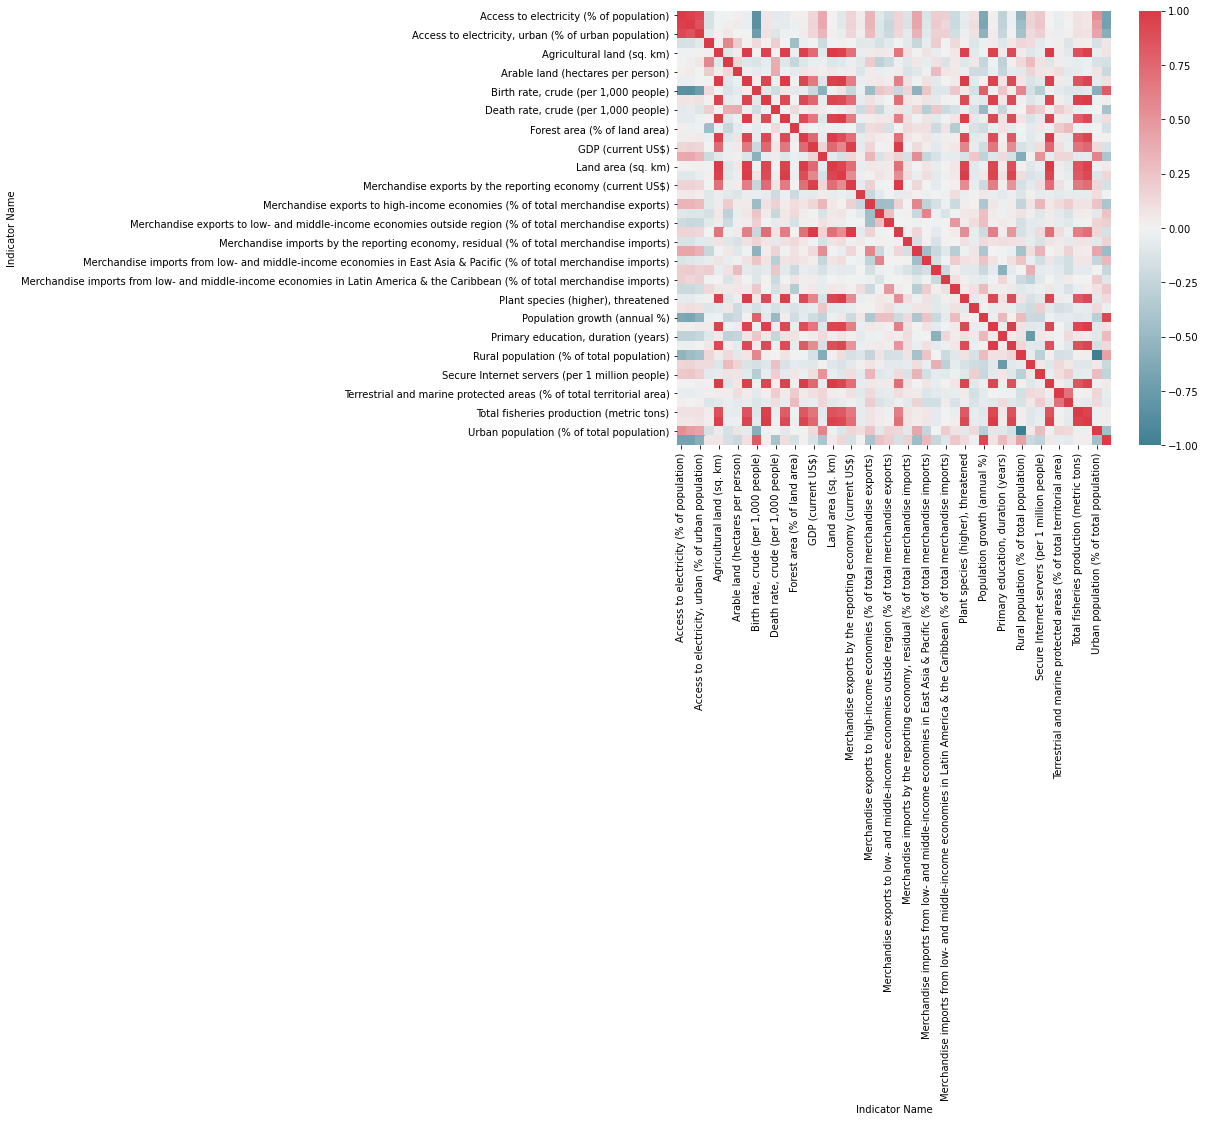

In [343]:
# voir le heatmap

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrice_corr, mask=np.zeros_like(matrice_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [344]:
vars_remove=["Agricultural land (sq. km)",
             "Arable land (hectares per person)",
             "Forest area (sq. km)",
             "GDP per capita (current US$)",
             "Rural population (% of total population)",
             "Population, total",
            "Terrestrial protected areas (% of total land area)",
            "Total fisheries production (metric tons)",
            "Urban population (% of total population)"]

new_names=["Access_elec_pop",
           "Access_elec_rural",
           "Access_elec_urban",
           "Agri_land",
          "arab_land",
          "bird_threatened",
          "birth_rate_crude",
          "fish_production",
          "Death_rate",
          "fish_threatened",
          "Forest_area",
          "GPD",
          "Land_area",
          "mammal_species_Threatened",
          "Merch_exports",
          "Merch_export_residual",
          "Merch_export_high_income",
          "Merch_export_low_middle_income",
          "Merch_export_low_middle_income_outside",
          "Merch_import",
          " Merch_import_residual",
          "Merch_import_high_income",
          "Merch_import_low_middle_income_East_ASIA_PAC",
          "Merch_import_low_middle_income_EU_CEN_ASIA",
          "Merch_import_low_middle_income_LAT_AME,CARIB",
          "Merch_import_low_middle_income_outside",
          "Plant_higher_threatened",
          "Pop_density",
           "pop_growth",
          "primary_education",
          "rural_pop",
          "secondary_education",
          "Secure_Internet_server",
          "surface_area",
          "Terre_marine_protect_area",
          "urban_pop",
          "urban_growth"]

In [347]:
# on enleve certains indicateurs (colonnes) qui donnent les memes informations sur un pays
new_WDIData3 = new_WDIData2.drop(vars_remove, axis=1)
new_WDIData3

In [353]:
# on renomme les colonnes
new_WDIData3.columns = [new_names]
new_WDIData3

,Access_elec_pop,Access_elec_rural,Access_elec_urban,Agri_land,arab_land,bird_threatened,birth_rate_crude,fish_production,Death_rate,fish_threatened,...,Pop_density,pop_growth,primary_education,rural_pop,secondary_education,Secure_Internet_server,surface_area,Terre_marine_protect_area,urban_pop,urban_growth
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,98.715622,98.309603,99.902145,58.081365,11.798854,16.0,32.487000,2.050000e+03,6.423000,4.0,...,56.937049,2.384309,6.0,27694940.0,6.0,52.862480,6.528600e+05,0.104707,9476982.0,3.349934
Africa Eastern and Southern,42.168241,26.813900,71.994933,44.117980,8.247616,655.0,33.913034,4.115035e+06,7.521453,1075.0,...,43.431367,2.665620,6.0,412813896.0,6.0,1164.559933,1.512116e+07,14.997499,230276235.0,4.046987
Africa Western and Central,51.253253,28.104923,80.357898,39.953545,11.224018,338.0,37.148465,4.178921e+06,10.166492,989.0,...,48.114080,2.704168,6.0,232268264.0,7.0,89.707350,9.166270e+06,14.198423,202961117.0,4.074033
Albania,100.000000,100.000000,100.000000,42.849672,22.311898,8.0,11.780000,8.648300e+03,7.898000,44.0,...,104.612263,-0.246732,5.0,1137407.0,7.0,526.099856,2.875000e+04,13.525683,1728969.0,1.317162
Algeria,99.641922,98.961946,99.898178,17.364964,3.151063,15.0,24.282000,1.152550e+05,4.716000,41.0,...,17.730062,2.007399,5.0,11558339.0,7.0,67.608505,2.381741e+06,7.105493,30670076.0,2.805020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,61.772453,51.013184,93.583656,15.340443,1.640689,8.0,29.595000,1.020100e+04,5.266000,18.0,...,24.009434,2.482425,6.0,218704.0,7.0,198.172034,1.219000e+04,0.090717,73971.0,2.923170
Vietnam,100.000000,100.000000,100.000000,39.245332,22.537814,52.0,16.745000,3.357090e+06,6.317000,83.0,...,308.143190,0.994310,5.0,61226806.0,7.0,1769.368394,3.312300e+05,2.929507,34319153.0,2.979419
"Yemen, Rep.",62.000000,48.698349,85.000000,44.297403,2.079095,16.0,30.453000,1.313080e+05,5.983000,40.0,...,53.977845,2.357044,6.0,18056196.0,6.0,3.754559,5.279700e+05,0.605801,10442487.0,4.080220


In [356]:
# importation de données sous format csv
new_WDIData3.to_csv("Data_cleaning.csv")

## Comprendre les fonctions :
### 1 - pd.melt

### 2 - pd.pivot_table

### 3 - pd.group_by